# Sectors Chosen: Healthcare, Consumer Staples, Energy 

## Overview of companies in the three sectors  
### Healthcare Sector


> #### 1. Cigna (CI)
- The Cigna Group is a health insurance and pharmacy benefits management(PBM) company headquartered in Connecticut, United States. The company's market capitalization is currently around 76.907 billion dollars, and its PBM services have been greatly expanded following its merger with Express Scripts in 2018.

> #### 2. UnitedHealth Group (UNH)
- UnitedHealth Group is a diversified healthcare company which is headquartered in Minnetonka, Minnesota with a market capitalization of 407.752 billion dollars. It provide four segments businesses: UnitedHealthcare, Optum Health, Optum Insight, and Optum Rx. It offers health benefit plans and services, pharmacy care services and programs, software and information products, and outsourcing contracts to various organizations.

> #### 3. Abbott Lab (ABT)
- Abbott Laboratories is a global healthcare company  founded in 1888 and is based in North Chicago, Illinois with a market capitalization of 181.407 billion dollars.  Abbott Lab develops and sells healthcare products. It has four segments: Established Pharmaceutical Products, Diagnostic Products, Nutritional Products, and Medical Devices. 

### Consumer Staples sectors
> #### 1. COSTCO (CST)
- Costco Wholesale Corporation is a retail company which is headquatered in Issaquah, Washington. COSTCO operates membership warehouses in multiple countries, offering a wide range of branded and private-label products in various merchandise categories. Its market capitalization is 219.466 billion dollars. 

> #### 2. Kraft Heinz (KHC)
- The Kraft Heinz Company is a global  food and beverage products manufacturers. Its products includes condiments, sauces, cheese and dairy products, meals, meats, refreshment beverages, coffee, and grocery products. The company is headquartered in Pittsburgh, Pennsylvania and its market capitalization is 48.215 billion dollars.  

> #### 3. Proctor and Gamble (PG)
- Procter & Gamble is a global company that produces consumer packaged goods. Its products include personal care, beauty, grooming, healthcare, fabric and home care, and baby and family care. Its market capitalization is 356.523 billion dollars and is headquartered in Cincinnati, Ohio.


### Energy sectors
> #### 1. Halliburton (HAL)
- Halliburton is a global oil and gas products and service provider in energy industry through two segments: Completion and Production, and Drilling and Evaluation. Halliburton also offers cloud-based digital services and artificial intelligence solutions for subsurface insights, integrated well construction, and reservoir and production management. The company  is headquartered in Houston, Texas and its market caplization is 30.51 billion dollars. 


> #### 2. Baker Hughes Co(BKR)
- Baker Hughes Company is a worldwide provider of energy and industrial technology and services, with two operating segments: Oilfield Services & Equipment and Industrial & Energy Technology. The company was incorporated in 2016 and is based in Houston, Texas and its current market capitaliztion is about 31.174 billion dollars. 

> #### 3. Chevron Corp (CVX) 
- Chevron Corporation is a US-based company engaged in the production and transportation of crude oil and natural gas, as well as the refining and marketing of petroleum products and chemicals. The company is headquartered in San Ramon, California  and its current market capitaliztion is about 323.889 billion dollars. 















In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import * 
import shutil
import sys
import os.path

# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass


# some stock-specific packages
!pip install yahoo_fin

!pip install requests_html
from yahoo_fin import *
import yahoo_fin.stock_info as si

# Install modeling module and solver
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.6 MB/s eta 0:00:00
[ipopt-linux64.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ipopt-linux64 or
        ipopt-linux64.zip, and cannot find ipopt-linux64.ZIP, period.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 10.0 MB/s eta 0:00:00
  Prepa

# Import Libs

# 1 - Data Preparation and EDA


## 1.1 Data Retrieval and Cleaning

In [ ]:
# Assign the ticker list that we want to scrap

# Healthcare: Cigna (CI), UnitedHealth Group (UNH), Abbott Lab (ABT)
# Cunsumer staples: Costco(COST), Heinz(KHC), P&G(PG)
# Energy : Halliburton(HAL), Baker Hughes(BKR), Chevron(CVX) 

tickers_list = ['CI','UNH','ABT', 'COST','KHC', 'PG', 'HAL', 'BKR', 'CVX']

# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the NFLX (one sample)
prep_data = pd.DataFrame(dow_prices['CI']['adjclose']).rename(columns = {"adjclose":"CI"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

In [ ]:
# Overview of stock dataset : The number of rows, columns, value counts and value types
print("This is the shape:\n", prep_data.shape, '\n') 
print("This is the info: \n")
print(prep_data.info(), '\n')

# Missing value- no missing values 
missing=prep_data.isnull().sum().sum() 
print('The number of missing values: ', missing) 

This is the shape:
 (1258, 9) 

This is the info: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CI      1258 non-null   float64
 1   UNH     1258 non-null   float64
 2   ABT     1258 non-null   float64
 3   COST    1258 non-null   float64
 4   KHC     1258 non-null   float64
 5   PG      1258 non-null   float64
 6   HAL     1258 non-null   float64
 7   BKR     1258 non-null   float64
 8   CVX     1258 non-null   float64
dtypes: float64(9)
memory usage: 98.3 KB
None 

The number of missing values:  0


In [ ]:
# Statistical information from the dataset 
prep_data.describe()

,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,182.582613,264.452405,77.646337,265.673441,40.875634,100.197713,27.928581,23.328610,92.126002
std,26.293712,79.394543,26.455088,99.472671,15.369222,24.751274,11.820391,6.230454,11.022020
min,125.146049,143.804520,34.819309,139.334167,17.620625,62.178459,4.449562,8.466909,47.194572
25%,162.670082,211.021351,55.314239,180.181549,27.525173,76.196495,19.354510,19.759668,84.005743
50%,180.461967,243.429604,75.143902,253.496826,35.645670,100.615341,23.582942,22.686236,94.548946
75%,200.336559,305.172165,102.064556,329.487656,50.525884,124.049379,38.941370,27.997649,100.449228
max,257.919098,497.415405,137.809662,563.016479,73.649414,158.222992,52.016262,37.973526,113.655014


## 1.2 Time Series Visualizations






In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()

# drop the na records
return_data.dropna(inplace=True)
return_data

,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
2017-01-04,0.022104,0.002849,0.007938,0.000188,-0.005712,0.003563,0.003771,-0.004306,-0.000255
2017-01-05,0.021554,0.001668,0.008638,0.019717,-0.005745,0.006627,0.005726,-0.006178,-0.004328
2017-01-06,0.000706,0.001418,0.027204,-0.000491,-0.002543,-0.000353,0.008005,-0.006061,-0.004007
2017-01-09,0.003808,-0.002832,-0.000981,-0.011423,-0.002780,-0.007409,-0.010413,-0.011257,-0.008559
2017-01-10,-0.014893,-0.002285,0.013500,0.004287,-0.001859,-0.010782,-0.025504,-0.013599,-0.007597
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.016012,0.002530,0.001223,0.001273,0.003988,0.004896,-0.000880,0.012542,0.002411
2021-12-27,0.008721,0.008317,0.016528,0.023802,0.005106,0.011680,0.020255,0.016515,0.020445
2021-12-28,0.011762,0.006887,-0.006999,0.002077,0.012137,0.005371,-0.005179,-0.001625,-0.001936
2021-12-29,0.004815,0.005249,0.005126,0.005543,-0.001394,0.008291,-0.004772,-0.012612,-0.005145


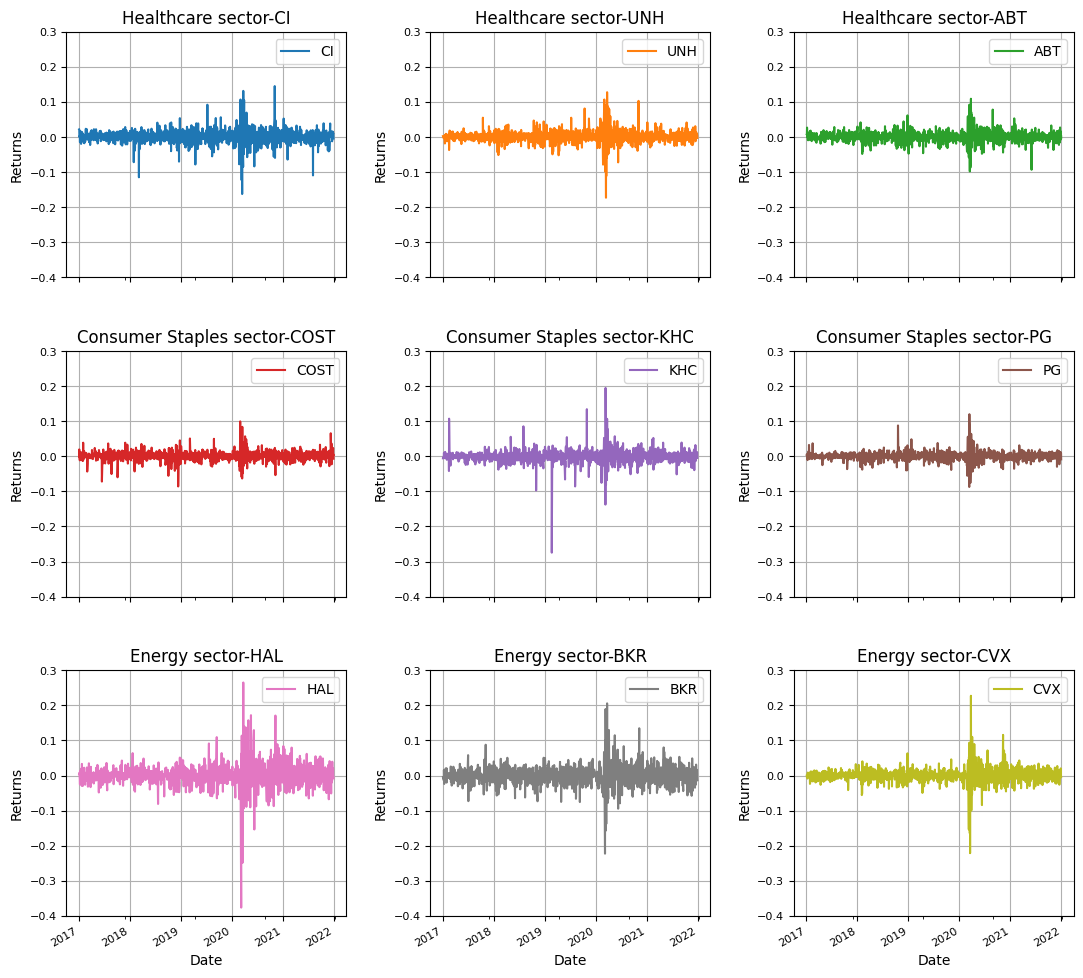

In [ ]:
# To explore the returns of each stock over time, create time-series plots for each of them.
titles = ['Healthcare sector-CI', 'Healthcare sector-UNH', 'Healthcare sector-ABT',
          'Consumer Staples sector-COST', 'Consumer Staples sector-KHC', 'Consumer Staples sector-PG',
          'Energy sector-HAL', 'Energy sector-BKR', 'Energy sector-CVX']

return_data.plot(subplots=True,
        grid=True, 
        layout=(3,3),
        figsize=(13,13),
        xlabel='Date',
        ylabel='Returns',
        ylim=(-0.4, 0.3), 
        legend=True,
        fontsize=8,
        title=titles)

# Create a 3 by 3 array of plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### 1.2.1 Visualization of Sector- Healthcare






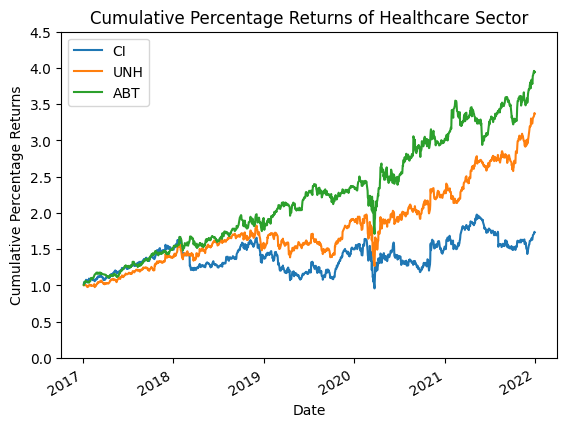

In [ ]:
# Calculate the cumulative product of the returns and plot the results of Healthcare sector

cumulative_returns = (1 + return_data.iloc[:,0:3]).cumprod()
cumulative_returns.plot(ylim=[0.0, 4.5])
plt.title('Cumulative Percentage Returns of Healthcare Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Returns')
plt.show()

In [ ]:
print("Average cumulative percentage returns for each stock:\n", return_data.iloc[:,0:3].mean(), '\n')
print("Average cumulative percentage returns for the sector:\n", return_data.iloc[:,0:3].mean().mean())

Average cumulative percentage returns for each stock:
 CI     0.000653
UNH    0.001128
ABT    0.001215
dtype: float64 

Average cumulative percentage returns for the sector:
 0.0009985263832135082


ABT shows the highest growth, althought it was also negatively impacted during the period of COVID-19.

### 1.2.2 Visualization of Sector- Consumer Staples


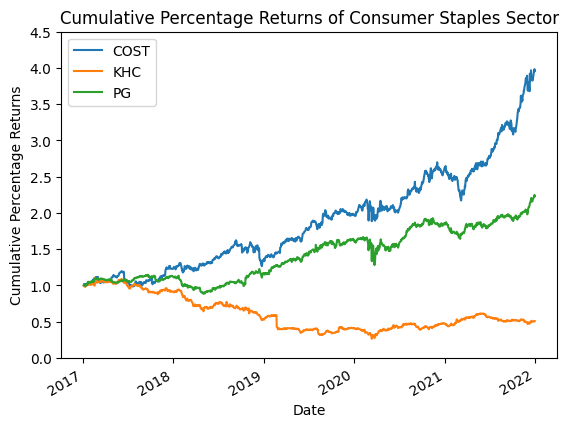

In [ ]:
# Calculate the cumulative product of the returns and plot the results of Consumer Staples sector

cumulative_returns = (1 + return_data.iloc[:,3:6]).cumprod()
cumulative_returns.plot(ylim=[0.0, 4.5])
plt.title('Cumulative Percentage Returns of Consumer Staples Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Returns')
plt.show()

COST shows a high growth, followed by PG. On the other hand, KHC faced a decline in growth rate.

In [ ]:
print("Average cumulative percentage returns for each stock:\n", return_data.iloc[:,3:6].mean(), '\n')
print("Average cumulative percentage returns for the sector:\n", return_data.iloc[:,3:6].mean().mean())

Average cumulative percentage returns for each stock:
 COST    0.001186
KHC    -0.000343
PG      0.000718
dtype: float64 

Average cumulative percentage returns for the sector:
 0.0005206067793974988



### 1.2.3 Visualization of Sector- Energy

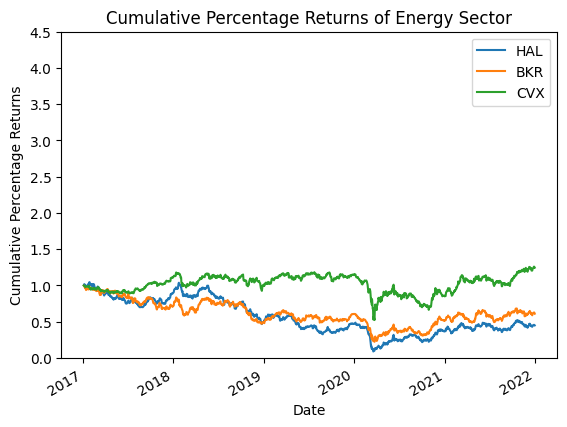

In [ ]:
# Calculate the cumulative product of the returns and plot the results on Energy sector

cumulative_returns = (1 + return_data.iloc[:,6:9]).cumprod()
cumulative_returns.plot(ylim=[0.0, 4.5])
plt.title('Cumulative Percentage Returns of Energy Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Returns')
plt.show()

These three stocks are relatively stable, but there is a slight downward trend.

In [ ]:
print("Average cumulative percentage returns for each stock: \n", return_data.iloc[:,6:9].mean(), '\n')
print("Average cumulative percentage returns for the sector: \n", "{:.8f}".format(return_data.iloc[:,6:9].mean().mean()))

Average cumulative percentage returns for each stock: 
 HAL   -0.000082
BKR   -0.000023
CVX    0.000393
dtype: float64 

Average cumulative percentage returns for the sector: 
 0.00009607


## 1.3 - Discussion of the Plots

- When we compared cumulative percentage return graphs, we found that the plots of healthcare sector and consumer staples sector have increased. 
- In the consumer staples sector, the plot of KHC is slightly decreasing from 2017 to 2022. It suggests that the stock has not performed well and has provided a negative return on investment over the given time period.
- Although there were sudden drops and recoveries in energy sector between 2020 and 2021,  The overall cumulative percentage return plots for the energy sector have remained stable. The overall plots of BKR and HAL were under 1. It suggests that the stock has not performed well and has provided a negative return on investment over the given time period.

# 2 - Optimization Model



## 2.1 Model execution

### Data preparation for Non-linear model 

In [ ]:
# download daily stock dataset
!gdown 1HT55Dp_K_wa3sftODCkijO2l2lwnc2zm

Downloading...
From: https://drive.google.com/uc?id=1HT55Dp_K_wa3sftODCkijO2l2lwnc2zm
To: /content/dailydata.csv
100% 156k/156k [00:00<00:00, 75.0MB/s]


In [ ]:
# Navigate daily return dataset
data=pd.read_csv('dailydata.csv')
data.head()

,Unnamed: 0,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
0,2017-01-04,0.022104,0.002850,0.007938,0.000188,-0.005712,0.003563,0.003771,-0.004305,-0.000255
1,2017-01-05,0.021554,0.001667,0.008638,0.019717,-0.005745,0.006627,0.005726,-0.006178,-0.004328
2,2017-01-06,0.000706,0.001418,0.027204,-0.000491,-0.002542,-0.000352,0.008006,-0.006061,-0.004007
3,2017-01-09,0.003808,-0.002832,-0.000981,-0.011423,-0.002781,-0.007409,-0.010413,-0.011257,-0.008559
4,2017-01-10,-0.014893,-0.002284,0.013500,0.004287,-0.001859,-0.010782,-0.025504,-0.013599,-0.007597


In [ ]:
# Remove timestamp : the data is in order, we don't need the timestamp 
del data['Unnamed: 0']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CI      1257 non-null   float64
 1   UNH     1257 non-null   float64
 2   ABT     1257 non-null   float64
 3   COST    1257 non-null   float64
 4   KHC     1257 non-null   float64
 5   PG      1257 non-null   float64
 6   HAL     1257 non-null   float64
 7   BKR     1257 non-null   float64
 8   CVX     1257 non-null   float64
dtypes: float64(9)
memory usage: 88.5 KB


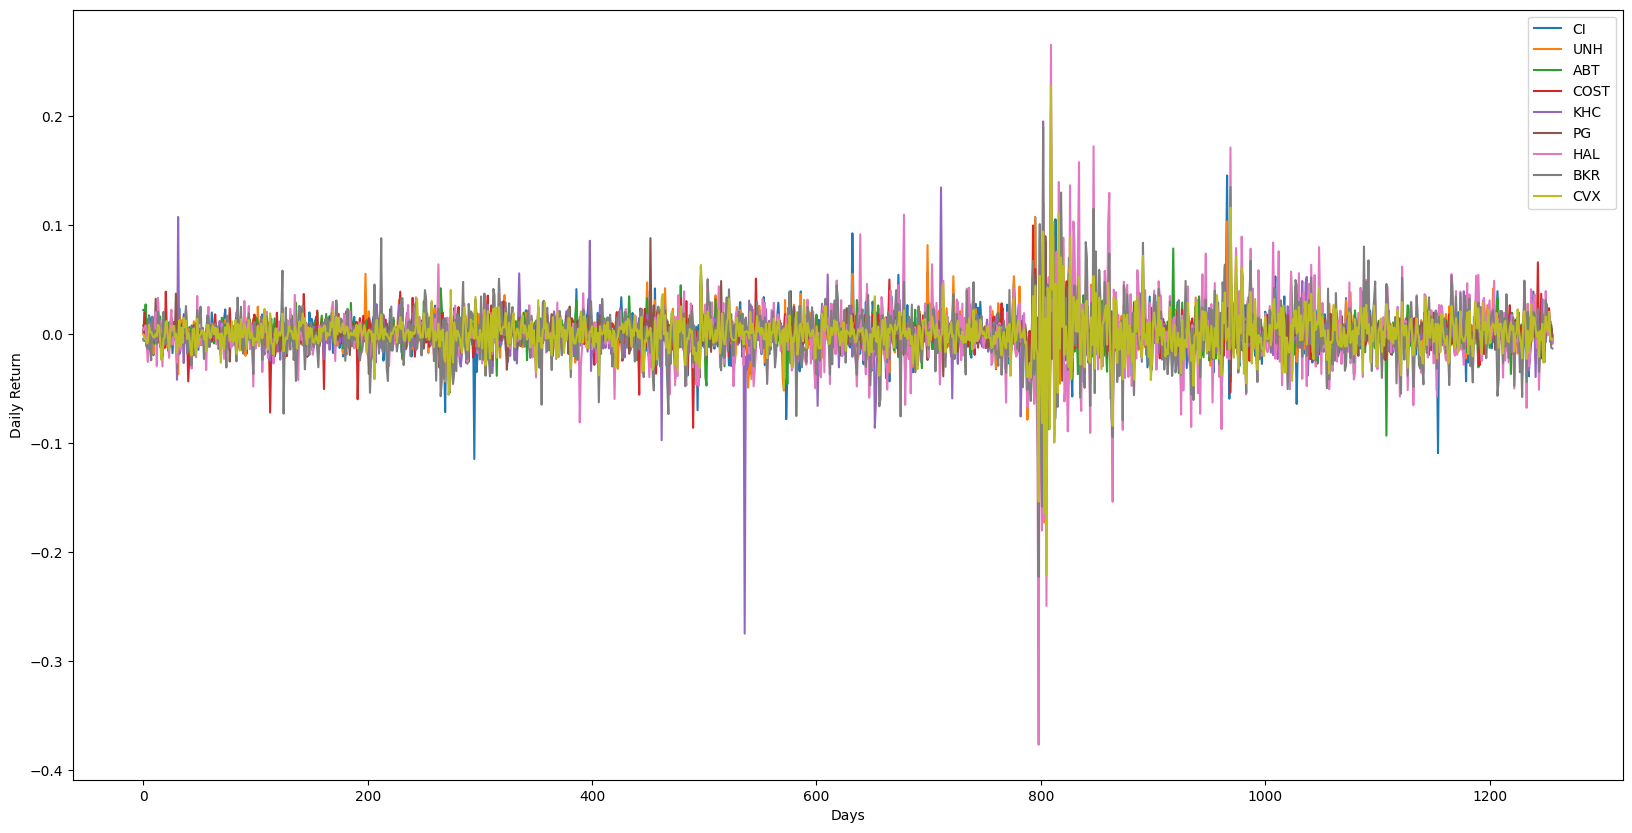

In [ ]:
# Visualize the volatility of daily return 
fig,ax=plt.subplots(figsize=(20,10))
data.plot(ax=ax)
plt.xlabel('Days')
plt.ylabel('Daily Return')
plt.show() 

In [ ]:
# Calculate the average returns by each selected stocks
Avg_Return = pd.DataFrame(np.mean(data) ,columns=["Avg_Return"])
print(Avg_Return, '\n')

# Calculate the standard deviation of returns by each selected stocks
Std_Dev_Return = pd.DataFrame(np.std(data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return,'\n')

      Avg_Return
CI      0.000653
UNH     0.001128
ABT     0.001215
COST    0.001186
KHC    -0.000343
PG      0.000718
HAL    -0.000082
BKR    -0.000023
CVX     0.000393 

      Std_Dev_Return
CI          0.020715
UNH         0.017929
ABT         0.015637
COST        0.013570
KHC         0.019555
PG          0.012680
HAL         0.032696
BKR         0.027127
CVX         0.020813 



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Covariance and Correlation 

In [ ]:
# here's the covariance matrix
Covariance_matrix = data.cov()
Covariance_matrix

,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
CI,0.000429,0.000284,0.000150,0.000098,0.000140,0.000094,0.000290,0.000225,0.000225
UNH,0.000284,0.000322,0.000158,0.000102,0.000123,0.000099,0.000213,0.000180,0.000193
ABT,0.000150,0.000158,0.000245,0.000102,0.000107,0.000098,0.000127,0.000114,0.000121
COST,0.000098,0.000102,0.000102,0.000184,0.000092,0.000083,0.000078,0.000078,0.000073
KHC,0.000140,0.000123,0.000107,0.000092,0.000383,0.000112,0.000207,0.000174,0.000151
PG,0.000094,0.000099,0.000098,0.000083,0.000112,0.000161,0.000100,0.000093,0.000086
HAL,0.000290,0.000213,0.000127,0.000078,0.000207,0.000100,0.001070,0.000659,0.000527
BKR,0.000225,0.000180,0.000114,0.000078,0.000174,0.000093,0.000659,0.000736,0.000400
CVX,0.000225,0.000193,0.000121,0.000073,0.000151,0.000086,0.000527,0.000400,0.000434


In [ ]:
# Correlation matrix 
Corr_matrix = data.corr()
Corr_matrix

,CI,UNH,ABT,COST,KHC,PG,HAL,BKR,CVX
CI,1.000000,0.764366,0.462808,0.349011,0.344216,0.357271,0.427668,0.399530,0.520804
UNH,0.764366,1.000000,0.563217,0.419011,0.350825,0.433094,0.362460,0.369684,0.516276
ABT,0.462808,0.563217,1.000000,0.480723,0.349011,0.494941,0.249095,0.268275,0.372000
COST,0.349011,0.419011,0.480723,1.000000,0.345277,0.481019,0.175762,0.210614,0.259499
KHC,0.344216,0.350825,0.349011,0.345277,1.000000,0.452708,0.323557,0.328350,0.369730
PG,0.357271,0.433094,0.494941,0.481019,0.452708,1.000000,0.240874,0.270665,0.325444
HAL,0.427668,0.362460,0.249095,0.175762,0.323557,0.240874,1.000000,0.742296,0.774100
BKR,0.399530,0.369684,0.268275,0.210614,0.328350,0.270665,0.742296,1.000000,0.707830
CVX,0.520804,0.516276,0.372000,0.259499,0.369730,0.325444,0.774100,0.707830,1.000000


In [ ]:
# creating covariance table on stock return dataframe
pd.set_option('display.width', 1000)
data_cov = data.cov()
with pd.option_context('expand_frame_repr', False):
    print('Covariance Matrix:')
print(data_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
data_return = data.mean()
print('Average Return:')
print(data_return)

Covariance Matrix:
            CI       UNH       ABT      COST       KHC        PG       HAL       BKR       CVX
CI    0.000429  0.000284  0.000150  0.000098  0.000140  0.000094  0.000290  0.000225  0.000225
UNH   0.000284  0.000322  0.000158  0.000102  0.000123  0.000099  0.000213  0.000180  0.000193
ABT   0.000150  0.000158  0.000245  0.000102  0.000107  0.000098  0.000127  0.000114  0.000121
COST  0.000098  0.000102  0.000102  0.000184  0.000092  0.000083  0.000078  0.000078  0.000073
KHC   0.000140  0.000123  0.000107  0.000092  0.000383  0.000112  0.000207  0.000174  0.000151
PG    0.000094  0.000099  0.000098  0.000083  0.000112  0.000161  0.000100  0.000093  0.000086
HAL   0.000290  0.000213  0.000127  0.000078  0.000207  0.000100  0.001070  0.000659  0.000527
BKR   0.000225  0.000180  0.000114  0.000078  0.000174  0.000093  0.000659  0.000736  0.000400
CVX   0.000225  0.000193  0.000121  0.000073  0.000151  0.000086  0.000527  0.000400  0.000434


Average Return:
CI      0.000

### Build the Nonlinear Optimization Model

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock
m.CI = Var(within=NonNegativeReals, bounds=(0,1))   # 1
m.UNH = Var(within=NonNegativeReals, bounds=(0,1))  # 2
m.ABT = Var(within=NonNegativeReals, bounds=(0,1))  # 3
m.COST = Var(within=NonNegativeReals, bounds=(0,1)) # 4
m.KHC = Var(within=NonNegativeReals, bounds=(0,1))  # 5
m.PG = Var(within=NonNegativeReals, bounds=(0,1))   # 6
m.HAL = Var(within=NonNegativeReals, bounds=(0,1))  # 7
m.BKR = Var(within=NonNegativeReals, bounds=(0,1))  # 8
m.CVX = Var(within=NonNegativeReals, bounds=(0,1))  # 9

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.CI*data_return[0] + 
                        m.UNH*data_return[1] + 
                        m.ABT*data_return[2] +
                        m.COST*data_return[3] + 
                        m.KHC*data_return[4] +
                        m.PG*data_return[5] +
                        m.HAL*data_return[6] +
                        m.BKR*data_return[7] +
                        m.CVX*data_return[8],
                        sense=maximize) # yes, we want to MAX our returns!
                        

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.CI + m.UNH + m.ABT + m.COST + m.KHC + m.PG + m.HAL + m.BKR + m.CVX  == 1)

# 2. Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.CI + m.UNH + m.ABT + m.COST + m.KHC + m.PG + m.HAL + m.BKR + m.CVX >= 0.0)

In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.CI,m.UNH,m.ABT,m.COST,m.KHC,m.PG,m.HAL,m.BKR,m.CVX
  tickers = ["CI","UNH","ABT","COST","KHC","PG","HAL","BKR","CVX"]
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*data_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 4. Set the max_risk of 0.0003
max_risk = 0.0003

# Sequence of risk levels
risk_limits = np.arange(0.0001, max_risk, 0.00000125) # take very tiny steps
risk_limits

array([0.0001    , 0.00010125, 0.0001025 , 0.00010375, 0.000105  ,
       0.00010625, 0.0001075 , 0.00010875, 0.00011   , 0.00011125,
       0.0001125 , 0.00011375, 0.000115  , 0.00011625, 0.0001175 ,
       0.00011875, 0.00012   , 0.00012125, 0.0001225 , 0.00012375,
       0.000125  , 0.00012625, 0.0001275 , 0.00012875, 0.00013   ,
       0.00013125, 0.0001325 , 0.00013375, 0.000135  , 0.00013625,
       0.0001375 , 0.00013875, 0.00014   , 0.00014125, 0.0001425 ,
       0.00014375, 0.000145  , 0.00014625, 0.0001475 , 0.00014875,
       0.00015   , 0.00015125, 0.0001525 , 0.00015375, 0.000155  ,
       0.00015625, 0.0001575 , 0.00015875, 0.00016   , 0.00016125,
       0.0001625 , 0.00016375, 0.000165  , 0.00016625, 0.0001675 ,
       0.00016875, 0.00017   , 0.00017125, 0.0001725 , 0.00017375,
       0.000175  , 0.00017625, 0.0001775 , 0.00017875, 0.00018   ,
       0.00018125, 0.0001825 , 0.00018375, 0.000185  , 0.00018625,
       0.0001875 , 0.00018875, 0.00019   , 0.00019125, 0.00019

### Infeasible solutions 

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return

for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)

  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
     continue
  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.CI(), m.UNH(), m.ABT(), m.COST(), m.KHC(), m.PG(), m.HAL(), m.BKR(), m.CVX()]
  # store our returns
  returns[r] =  m.CI()*data_return[0] + m.UNH()*data_return[1] + m.ABT()*data_return[2] + m.COST()*data_return[3] + m.KHC()*data_return[4] + m.PG()*data_return[5] + m.HAL()*data_return[6] + m.BKR()*data_return[7] + m.CVX()*data_return[8]

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iter

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 3.2185921669006348
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of so

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 6.311976671218872
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of sol

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 5.86904501914978
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solu

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 3.500016689300537
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of sol

  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 2.928241729736328
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of sol

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.04829978942871094
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# =====

In [ ]:
# allocation of each stock based on input risk level
param_analysis[0.00015000000000000012]

[6.114405667955628e-06,
 0.10081325277419977,
 0.3197221889686681,
 0.5787516852033756,
 2.180475237057648e-06,
 0.0006928673444711934,
 2.6468235251921675e-06,
 3.0346675345560624e-06,
 6.029337320505818e-06]

## 2.2 Plot with allocation of the stocks

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print('Subset of risk: ','\n',risk,'\n')

reward = list(returns.values()) # coerce dict_values to a list
print('Subset of reward: ','\n',reward) # we aren't allowed to name our value 'return' - this is a reserved name.

Subset of risk:  
 [0.00010750000000000002, 0.00011000000000000003, 0.00011250000000000004, 0.00011500000000000004, 0.00011625000000000005, 0.00011875000000000005, 0.00012000000000000006, 0.00012125000000000006, 0.00012250000000000005, 0.00012375000000000005, 0.00012500000000000006, 0.00012625000000000006, 0.00012750000000000006, 0.00012875000000000007, 0.00013000000000000007, 0.00013125000000000007, 0.00013250000000000008, 0.00013375000000000008, 0.00013500000000000008, 0.00013625000000000009, 0.0001375000000000001, 0.0001387500000000001, 0.0001400000000000001, 0.0001412500000000001, 0.0001425000000000001, 0.0001437500000000001, 0.0001450000000000001, 0.0001462500000000001, 0.00014750000000000012, 0.00014875000000000012, 0.00015000000000000012, 0.00015125000000000013, 0.00015250000000000013, 0.00015375000000000013, 0.00015500000000000014, 0.00015625000000000014, 0.00015750000000000014, 0.00015875000000000015, 0.00016000000000000015, 0.00016125000000000015, 0.00016250000000000016, 0.00

In [ ]:
# we can identify that among 160 risk level, ten risk levels are discard due to the infeasible problem 

tmp1=pd.DataFrame(risk_limits)
tmp2=pd.DataFrame(risk)

print('The number of risk level: ',tmp1.shape[0])
print('The number of risk subset: ',tmp2.shape[0]) 


The number of risk level:  160
The number of risk subset:  150


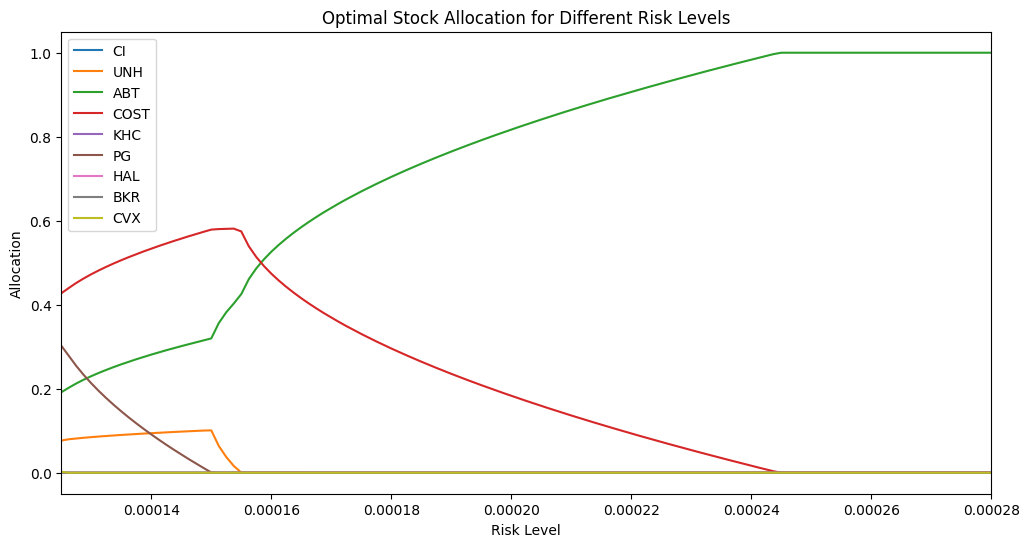

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
fig, ax = plt.subplots(figsize = (12,6))
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'CI', 'UNH', 'ABT','COST', 'KHC', 'PG', 'HAL', 'BKR', 'CVX']
param_analysis.plot(ax=ax)
plt.xlabel('Risk Level')
plt.ylabel('Allocation')
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.xlim(0.000125, 0.00028)
plt.show()

## 2.3 Plot with efficient frontier

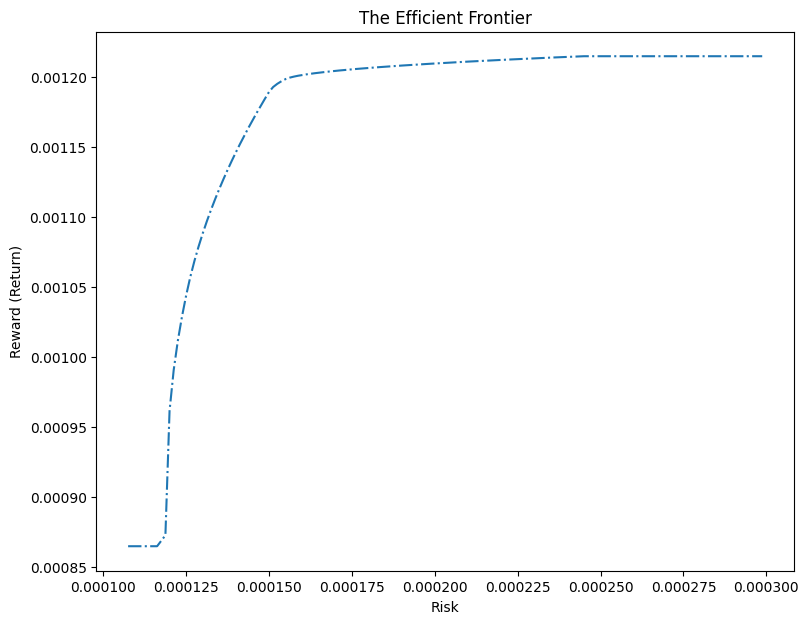

In [ ]:
# plot! pylab makes it easy
fig, ax = plt.subplots(figsize = (9,7))
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

## 2.4 Portfolio selection

### Selected Stocks: COST(58%), ABT(32%), UNH(10%)

- According to "Optimal Stock Allocation for Different Risk Levels", we are allocating 58% of our budget to Costco (COST), 32% to Abbot Lab(ABT), and 10% to UnitedHealth Group (UNH).

# 3 - Analysis

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creating empty dataframes for each of the three stocks
stnk_UNH = pd.DataFrame()
stnk_abt = pd.DataFrame()
stnk_cost = pd.DataFrame()

# Creating a dictionary 'sel3' to reference each stock with its dataframes
sel3 = {'UNH':stnk_UNH, 'ABT':stnk_abt, 'COST':stnk_cost}

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime

## 3.1 - Buy-and-Hold strategy for the MPT portfolio

There are several strategies to deploy while investing in the stock market. Buying and holding stocks or other investment vehicles for longer period of time to realize a return is one such strategy. 

In [ ]:
 # Retrieving market data for the selected stocks
 for stock in sel3:
  sel3[stock] = si.get_data(stock,start_date = '01/01/2017',end_date='12/31/2021')
  day = np.arange(1, len(sel3[stock]) + 1) 
  sel3[stock]['Day'] = day
  sel3[stock].drop(columns=['adjclose', 'volume'], inplace = True)
  sel3[stock] = sel3[stock][['Day', 'open', 'high', 'low', 'close']]
 
 # Printing the output
  print(stock)
  print(sel3[stock].head())
  print()

UNH
            Day        open        high         low       close
2017-01-03    1  161.130005  162.270004  159.149994  161.449997
2017-01-04    2  162.350006  162.580002  159.740005  161.910004
2017-01-05    3  161.750000  162.630005  161.509995  162.179993
2017-01-06    4  161.750000  162.940002  161.110001  162.410004
2017-01-09    5  162.000000  162.429993  160.779999  161.949997

ABT
            Day       open       high        low      close
2017-01-03    1  38.630001  39.080002  38.340000  39.049999
2017-01-04    2  39.060001  39.730000  39.060001  39.360001
2017-01-05    3  39.240002  39.750000  38.980000  39.700001
2017-01-06    4  39.700001  40.990002  39.660000  40.779999
2017-01-09    5  40.790001  41.060001  40.619999  40.740002

COST
            Day        open        high         low       close
2017-01-03    1  160.649994  160.990005  158.509995  159.729996
2017-01-04    2  159.800003  160.490005  158.940002  159.759995
2017-01-05    3  160.949997  163.350006  160.6300

In [ ]:
# Understanding the data types
for stock in sel3:
  print(stock)
  print(sel3[stock].info())
  print()

UNH
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1258 non-null   int64  
 1   open    1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   close   1258 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
None

ABT
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1258 non-null   int64  
 1   open    1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   close   1258 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
None

COST
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (t

In [ ]:
# Understanding the summary statistics for the selected stocks
for stock in sel3:
  print(stock)
  print(sel3[stock].describe())
  print()

UNH
               Day         open         high          low        close
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000
mean    629.500000   277.677258   280.489038   274.852488   277.747973
std     363.297628    77.244419    77.958456    76.691350    77.324938
min       1.000000   157.619995   159.520004   156.089996   157.619995
25%     315.250000   226.499996   229.552498   223.712498   226.677502
50%     629.500000   259.955002   262.534988   256.794998   260.009995
75%     943.750000   316.952499   321.077499   314.427505   316.974998
max    1258.000000   507.929993   509.230011   503.649994   505.579987

ABT
               Day         open         high          low        close
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000
mean    629.500000    82.163378    82.931216    81.394984    82.194976
std     363.297628    26.183729    26.447267    25.920960    26.169718
min       1.000000    38.630001    39.080002    38.340000    39.0499

In [ ]:
for stock in sel3:
  sel3[stock]['logClose'] = np.log(sel3[stock]['close']) 
  sel3[stock]['return'] = sel3[stock]['logClose'].diff() 
  print(stock)
  print(sel3[stock].head())
  print()

UNH
            Day        open        high         low       close  logClose    return
2017-01-03    1  161.130005  162.270004  159.149994  161.449997  5.084195       NaN
2017-01-04    2  162.350006  162.580002  159.740005  161.910004  5.087041  0.002845
2017-01-05    3  161.750000  162.630005  161.509995  162.179993  5.088707  0.001666
2017-01-06    4  161.750000  162.940002  161.110001  162.410004  5.090124  0.001417
2017-01-09    5  162.000000  162.429993  160.779999  161.949997  5.087288 -0.002836

ABT
            Day       open       high        low      close  logClose    return
2017-01-03    1  38.630001  39.080002  38.340000  39.049999  3.664843       NaN
2017-01-04    2  39.060001  39.730000  39.060001  39.360001  3.672750  0.007907
2017-01-05    3  39.240002  39.750000  38.980000  39.700001  3.681351  0.008601
2017-01-06    4  39.700001  40.990002  39.660000  40.779999  3.708192  0.026841
2017-01-09    5  40.790001  41.060001  40.619999  40.740002  3.707210 -0.000981

COST
 

Modifying the dataframe to use 0 for the first day instead of Nan since we start with 0% return on the first day.

In [ ]:
for stock in sel3:
  sel3[stock]['return'].iloc[0] = 0.0
  print(stock)
  print(sel3[stock].head())
  print()

UNH
            Day        open        high         low       close  logClose    return
2017-01-03    1  161.130005  162.270004  159.149994  161.449997  5.084195  0.000000
2017-01-04    2  162.350006  162.580002  159.740005  161.910004  5.087041  0.002845
2017-01-05    3  161.750000  162.630005  161.509995  162.179993  5.088707  0.001666
2017-01-06    4  161.750000  162.940002  161.110001  162.410004  5.090124  0.001417
2017-01-09    5  162.000000  162.429993  160.779999  161.949997  5.087288 -0.002836

ABT
            Day       open       high        low      close  logClose    return
2017-01-03    1  38.630001  39.080002  38.340000  39.049999  3.664843  0.000000
2017-01-04    2  39.060001  39.730000  39.060001  39.360001  3.672750  0.007907
2017-01-05    3  39.240002  39.750000  38.980000  39.700001  3.681351  0.008601
2017-01-06    4  39.700001  40.990002  39.660000  40.779999  3.708192  0.026841
2017-01-09    5  40.790001  41.060001  40.619999  40.740002  3.707210 -0.000981

COST
 

<ipython-input-41-04c37d0f4e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3[stock]['return'].iloc[0] = 0.0
<ipython-input-41-04c37d0f4e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3[stock]['return'].iloc[0] = 0.0
<ipython-input-41-04c37d0f4e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3[stock]['return'].iloc[0] = 0.0


Computing the compound return of every day we stayed on the stock to calculate the overall return of the buy and hold strategy for each stock.

In [ ]:
weights = {'ABT': 0.32, 'COST': 0.58, 'UNH': 0.10}  # Specific weights for each stock
portfolio_return = pd.DataFrame()
for stock in sel3:
  sel3[stock]['weightedReturn'] = weights[stock] * sel3[stock]['return']
  if portfolio_return.empty:
    portfolio_return = sel3[stock][['weightedReturn']].copy()
  else:
    portfolio_return['weightedReturn'] += sel3[stock]['weightedReturn']
portfolio_return

,weightedReturn
2017-01-03,0.000000
2017-01-04,0.002924
2017-01-05,0.014244
2017-01-06,0.008446
2017-01-09,-0.007261
...,...
2021-12-23,0.001382
2021-12-27,0.019717
2021-12-28,-0.000358
2021-12-29,0.005366


In [ ]:
np.exp(np.sum(portfolio_return['weightedReturn'])) -1

2.5127333494883928

In [ ]:
for stock in sel3:
  bh_return=np.exp(np.sum(sel3[stock]['return'])) -1
  bh_return_pct =bh_return *100
  print("Return percentage from Buy and hold strategy of " + stock + " is " + "{:.2f}%".format(bh_return_pct))
  

Return percentage from Buy and hold strategy of UNH is 212.44%
Return percentage from Buy and hold strategy of ABT is 261.08%
Return percentage from Buy and hold strategy of COST is 253.04%


## 3.2 - Momentum trading strategy for each stock in the MPT portfolio

Momentum trading strategy is making trade decisions by looking at the price trend. In our context we use 8-21 trading window, we compute the moving averages at 8th day and 21st day then we compare the prices at those days. If a stock price at day 8 is less than 21 than that means the stock is in a downward trend therefore we sell it and vice versa.

In [ ]:
for stock in sel3:
  
  # creating a list of periods which contains the days for selected strategies for moving average
  period = [8,21]
  
  # Creating columns of moving averages for above period list
  for p in period:
    sel3[stock][f'{p}-day'] = sel3[stock]['close'].rolling(p).mean().shift()
  
  # dropping rows with missing values
  sel3[stock].dropna(inplace=True)
  
  # printing the required result
  print(stock)
  print(sel3[stock].head(n=10))
  print()

UNH
            Day        open        high         low       close  logClose    return  weightedReturn       8-day      21-day
2017-02-02   22  162.520004  163.250000  160.259995  160.759995  5.079913 -0.012057       -0.001206  161.672503  161.270001
2017-02-03   23  161.130005  162.000000  160.210007  161.869995  5.086794  0.006881        0.000688  161.883751  161.237144
2017-02-06   24  161.509995  162.529999  160.220001  160.509995  5.078356 -0.008437       -0.000844  162.063751  161.235239
2017-02-07   25  161.050003  161.679993  159.539993  160.529999  5.078481  0.000125        0.000012  161.972500  161.155715
2017-02-08   26  160.000000  160.630005  159.410004  160.309998  5.077109 -0.001371       -0.000137  161.695000  161.066191
2017-02-09   27  160.309998  161.300003  159.559998  160.440002  5.077920  0.000811        0.000081  161.359999  160.988096
2017-02-10   28  160.119995  161.589996  160.100006  160.750000  5.079850  0.001930        0.000193  161.153749  160.933810
2017

Plotting the close price along with 8 day and 21 day moving averages to visualize the trend. 

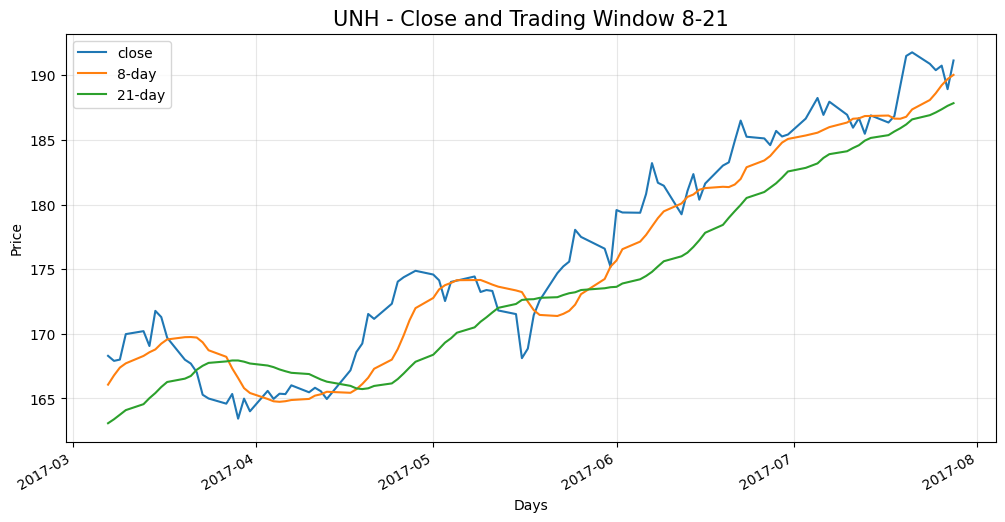

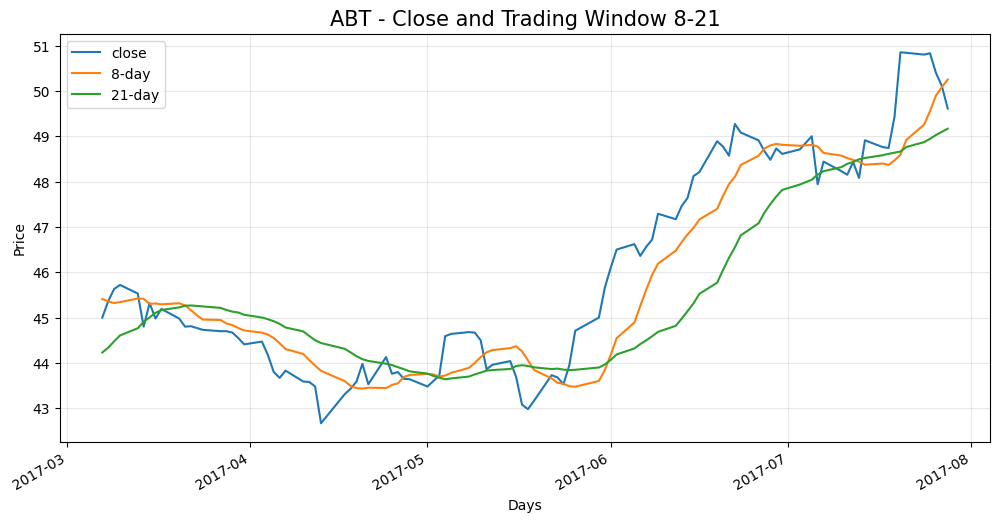

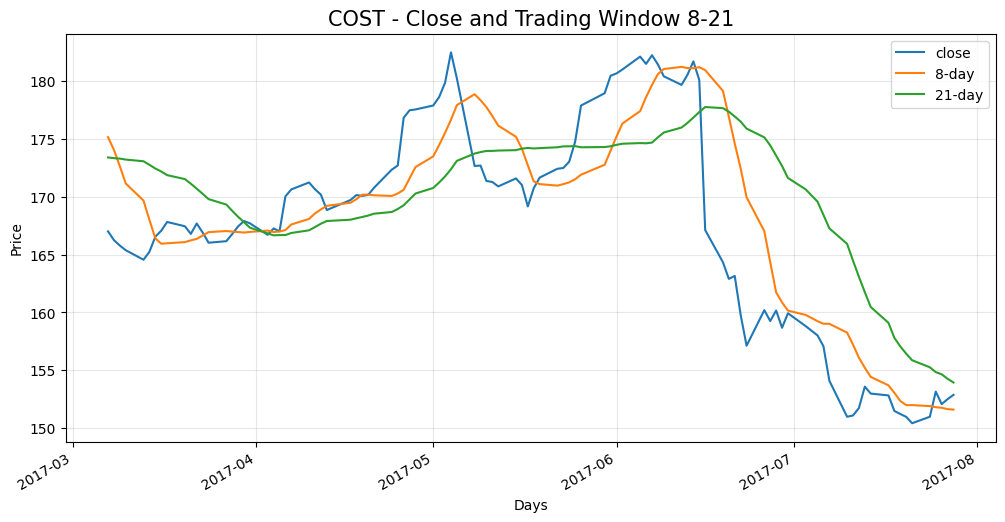

In [ ]:
for stock in sel3:
  sel3[stock].iloc[22:123,[4,8,9]].plot(figsize=(12,6))
  ylabel('Price')
  xlabel('Days')
  plt.grid(True, alpha = .3)
  plt.title(f'{stock} - Close and Trading Window 8-21', fontsize = 15)
  plt.show()

In [ ]:
for stock in sel3:
 sel3[stock]['invested'] = np.where(sel3[stock]['8-day'] > sel3[stock]['21-day'], 1, 0)
 print(stock)
 print(sel3[stock].head())
 print()

UNH
            Day        open        high         low       close  logClose    return  weightedReturn       8-day      21-day  invested
2017-02-02   22  162.520004  163.250000  160.259995  160.759995  5.079913 -0.012057       -0.001206  161.672503  161.270001         1
2017-02-03   23  161.130005  162.000000  160.210007  161.869995  5.086794  0.006881        0.000688  161.883751  161.237144         1
2017-02-06   24  161.509995  162.529999  160.220001  160.509995  5.078356 -0.008437       -0.000844  162.063751  161.235239         1
2017-02-07   25  161.050003  161.679993  159.539993  160.529999  5.078481  0.000125        0.000012  161.972500  161.155715         1
2017-02-08   26  160.000000  160.630005  159.410004  160.309998  5.077109 -0.001371       -0.000137  161.695000  161.066191         1

ABT
            Day       open       high        low      close  logClose    return  weightedReturn     8-day     21-day  invested
2017-02-02   22  42.330002  42.790001  41.849998  42.750000 

In this dataframe the column 'Invested' indicates whether we are invested in the stock or not. This decision is made based on the momentum trading strategy as disucussed above. Here, 1 indicates that the stock is being held and 0 indicates it is not.

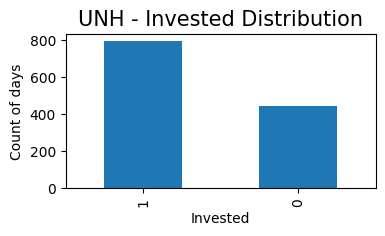

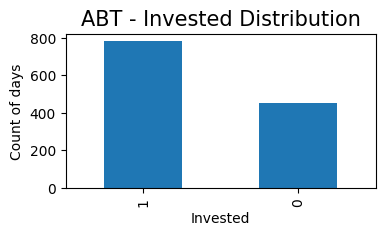

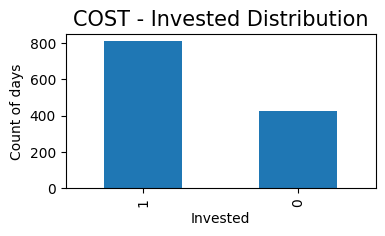

In [ ]:
for stock in sel3:
    value_counts = sel3[stock]['invested'].value_counts()
    value_counts.plot(kind='bar', figsize=(4,2))
    plt.title(f'{stock} - Invested Distribution', fontsize=15)
    plt.xlabel('Invested')
    plt.ylabel('Count of days')
    plt.show()

By visualzing the count of days the stock was held and not held we can see that the stock had more upward trends than downward. 

In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
for stock in sel3:
  sel3[stock]['signal'] = sel3[stock]['invested'].diff()
  print(stock)
  print(sel3[stock]['signal'].value_counts()) 

UNH
 0.0    1162
-1.0      37
 1.0      37
Name: signal, dtype: int64
ABT
 0.0    1170
-1.0      33
 1.0      33
Name: signal, dtype: int64
COST
 0.0    1180
-1.0      28
 1.0      28
Name: signal, dtype: int64


In [ ]:
for stock in sel3:
  print(stock)
  print(sel3[stock].head())

UNH
            Day        open        high         low       close  logClose    return  weightedReturn       8-day      21-day  invested  signal
2017-02-02   22  162.520004  163.250000  160.259995  160.759995  5.079913 -0.012057       -0.001206  161.672503  161.270001         1     NaN
2017-02-03   23  161.130005  162.000000  160.210007  161.869995  5.086794  0.006881        0.000688  161.883751  161.237144         1     0.0
2017-02-06   24  161.509995  162.529999  160.220001  160.509995  5.078356 -0.008437       -0.000844  162.063751  161.235239         1     0.0
2017-02-07   25  161.050003  161.679993  159.539993  160.529999  5.078481  0.000125        0.000012  161.972500  161.155715         1     0.0
2017-02-08   26  160.000000  160.630005  159.410004  160.309998  5.077109 -0.001371       -0.000137  161.695000  161.066191         1     0.0
ABT
            Day       open       high        low      close  logClose    return  weightedReturn     8-day     21-day  invested  signal
2017-

In [ ]:
# Replcaing the value of every signal column to 1 in the first column of each data frame
for stock in sel3:
  sel3[stock]['signal'].iloc[0] = 1.0
  print(stock)
  print(sel3[stock].head())

UNH
            Day        open        high         low       close  logClose    return  weightedReturn       8-day      21-day  invested  signal
2017-02-02   22  162.520004  163.250000  160.259995  160.759995  5.079913 -0.012057       -0.001206  161.672503  161.270001         1     1.0
2017-02-03   23  161.130005  162.000000  160.210007  161.869995  5.086794  0.006881        0.000688  161.883751  161.237144         1     0.0
2017-02-06   24  161.509995  162.529999  160.220001  160.509995  5.078356 -0.008437       -0.000844  162.063751  161.235239         1     0.0
2017-02-07   25  161.050003  161.679993  159.539993  160.529999  5.078481  0.000125        0.000012  161.972500  161.155715         1     0.0
2017-02-08   26  160.000000  160.630005  159.410004  160.309998  5.077109 -0.001371       -0.000137  161.695000  161.066191         1     0.0
ABT
            Day       open       high        low      close  logClose    return  weightedReturn     8-day     21-day  invested  signal
2017-

<ipython-input-51-c40955f48a56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3[stock]['signal'].iloc[0] = 1.0
<ipython-input-51-c40955f48a56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3[stock]['signal'].iloc[0] = 1.0
<ipython-input-51-c40955f48a56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3[stock]['signal'].iloc[0] = 1.0


In [ ]:
 for stock in sel3:
   print(stock)
   print(sel3[stock][sel3[stock]['signal'].isin([-1, 1])])

UNH
             Day        open        high         low       close  logClose    return  weightedReturn       8-day      21-day  invested  signal
2017-02-02    22  162.520004  163.250000  160.259995  160.759995  5.079913 -0.012057       -0.001206  161.672503  161.270001         1     1.0
2017-03-28    59  164.580002  166.070007  163.839996  165.350006  5.108064  0.004546        0.000455  167.327499  167.941905         0    -1.0
2017-04-19    74  169.589996  171.190002  168.690002  169.250000  5.131377  0.003907        0.000391  166.119999  165.728571         1     1.0
2017-05-17    94  168.119995  170.389999  166.649994  168.860001  5.129070  0.004392        0.000439  172.496250  172.669524         0    -1.0
2017-05-30   102  177.539993  178.080002  176.240005  176.589996  5.173831 -0.005140       -0.000514  174.244999  173.528571         1     1.0
...          ...         ...         ...         ...         ...       ...       ...             ...         ...         ...       ...    

In [ ]:
for stock in sel3:
    sel3[stock]['invested'] = np.where(sel3[stock]['8-day'] > sel3[stock]['21-day'], 1, 0)
    sel3[stock]['system_return'] = sel3[stock]['invested'] * sel3[stock]['return']
    print(f'{stock} System Return: {np.exp(np.sum(sel3[stock]["system_return"])) - 1}')

UNH System Return: 0.16392733923653435
ABT System Return: 0.9124145503293275
COST System Return: 0.8550610007611852


Creating plots to visualize the days when buy and sell trades are executed. Green triangle indicates a buy trade and red to indicate selling.

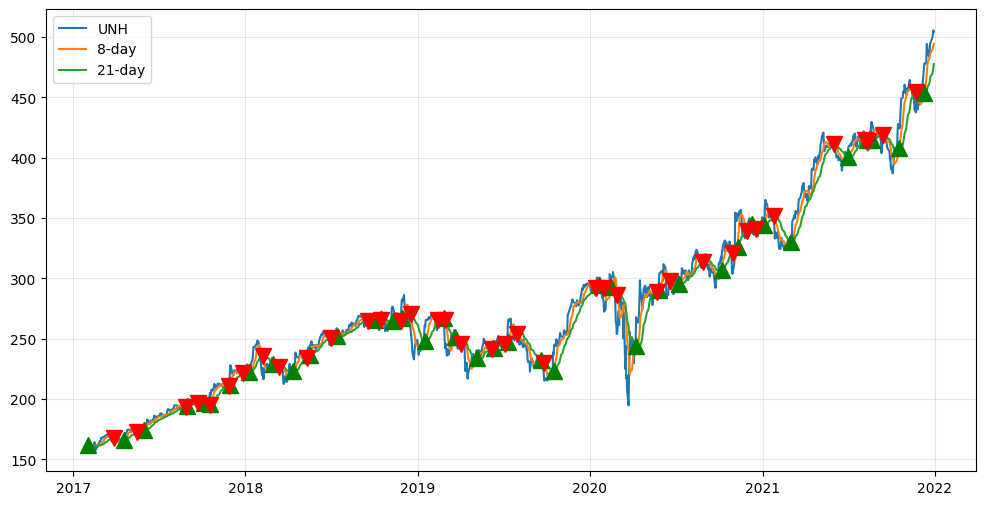

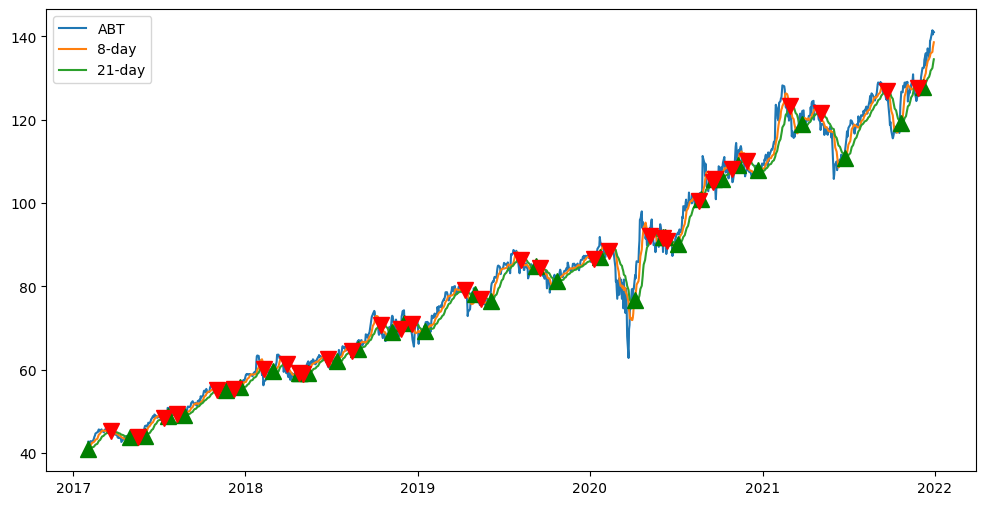

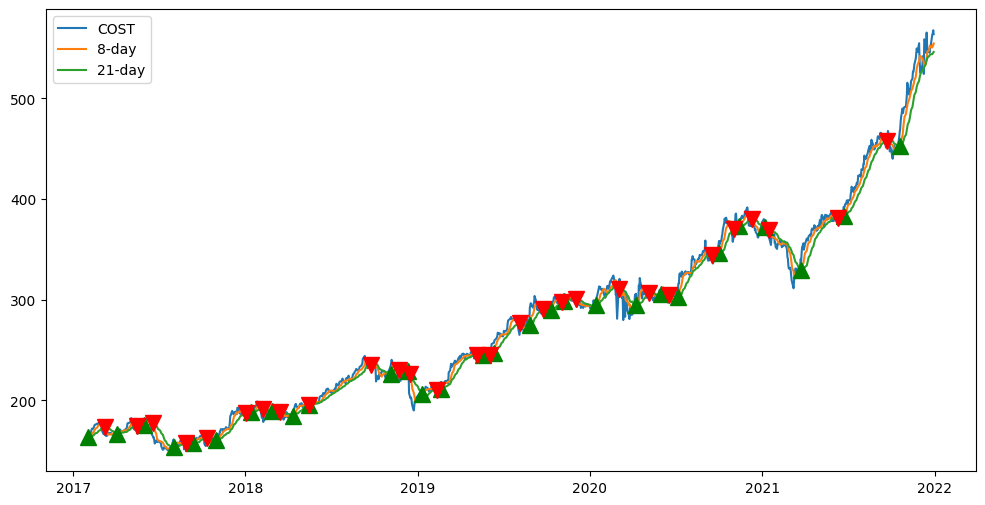

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)

for stock in sel3:
    plt.plot(sel3[stock].iloc[:]['close'], label = stock) # actual value
    plt.plot(sel3[stock].iloc[:]['8-day'], label = '8-day') # 8-day average
    plt.plot(sel3[stock].iloc[:]['21-day'], label = '21-day') # 21-day average
    plt.plot(sel3[stock][:].loc[sel3[stock].signal == 1].index, sel3[stock][:]['8-day'][sel3[stock].signal == 1], '^',
             color = 'g', markersize = 12)
    plt.plot(sel3[stock][:].loc[sel3[stock].signal == -1].index, sel3[stock][:]['21-day'][sel3[stock].signal == -1], 'v',
             color = 'r', markersize = 12)
    plt.legend(loc=2)
    plt.show()

## 3.3 - Momentum trading strategy for the entire MPT portfolio

In [ ]:
weights = {'ABT': 0.32, 'COST': 0.58, 'UNH': 0.10}
ms_return = pd.DataFrame()

for stock in sel3:
    sel3[stock]['port_Open'] = weights[stock] * sel3[stock]['open']
    sel3[stock]['port_Close'] = weights[stock] * sel3[stock]['close']
    sel3[stock]['port_High'] = weights[stock] * sel3[stock]['high']
    sel3[stock]['port_Low'] = weights[stock] * sel3[stock]['low']
    
    if ms_return.empty:
        ms_return = sel3[stock][['Day', 'open', 'close', 'high', 'low']].copy()
        ms_return['port_Open'] = sel3[stock]['port_Open']
        ms_return['port_Close'] = sel3[stock]['port_Close']
        ms_return['port_High'] = sel3[stock]['port_High']
        ms_return['port_Low'] = sel3[stock]['port_Low']
    else:
        ms_return['port_Open'] += sel3[stock]['port_Open']
        ms_return['port_Close'] += sel3[stock]['port_Close']
        ms_return['port_High'] += sel3[stock]['port_High']
        ms_return['port_Low'] += sel3[stock]['port_Low']
    
ms_return = ms_return[['Day', 'port_Open', 'port_Close', 'port_High', 'port_Low']]
print(ms_return)

             Day   port_Open  port_Close   port_High    port_Low
2017-02-02    22  126.564799  127.282996  127.968203  125.790801
2017-02-03    23  127.131401  127.502203  127.928798  126.580797
2017-02-06    24  127.317795  126.505999  127.477396  126.227404
2017-02-07    25  126.894799  126.939402  127.408000  126.141399
2017-02-08    26  126.801200  127.282599  127.507205  126.620600
...          ...         ...         ...         ...         ...
2021-12-23  1254  414.197192  413.283799  415.202390  411.215594
2021-12-27  1255  414.503589  422.029785  423.791195  414.116801
2021-12-28  1256  422.294996  422.735609  424.530411  420.087608
2021-12-29  1257  423.940414  425.045411  427.517396  421.615601
2021-12-30  1258  426.371617  422.630784  426.813404  421.528395

[1237 rows x 5 columns]


In [ ]:
ms_return['8-day'] = ms_return['port_Close'].rolling(8).mean().shift()
ms_return['21-day'] = ms_return['port_Close'].rolling(21).mean().shift()
ms_return['logClose'] = np.log(ms_return['port_Close']) 
ms_return['return'] = ms_return['logClose'].diff()
ms_return.dropna(inplace=True)
ms_return.head(n=10)

,Day,port_Open,port_Close,port_High,port_Low,8-day,21-day,logClose,return
2017-03-06,43,129.397602,128.014998,130.248002,127.412001,133.316349,130.986762,4.852147,-0.015778
2017-03-07,44,127.777396,128.090000,129.186797,127.680595,132.713724,131.021619,4.852733,0.000586
2017-03-08,45,128.020599,127.725404,128.491003,127.427202,132.127348,131.049610,4.849883,-0.002850
2017-03-09,46,127.842196,127.549202,128.281997,127.055597,131.354474,131.107676,4.848502,-0.001380
2017-03-10,47,128.052603,127.542997,128.238800,127.057597,130.535024,131.136715,4.848454,-0.000049
2017-03-13,48,127.220005,127.029602,127.506399,126.722602,129.761899,131.149114,4.844420,-0.004033
2017-03-14,49,126.668604,127.081203,127.383604,126.354404,128.822900,131.064162,4.844826,0.000406
2017-03-15,50,127.353804,128.273596,128.318197,126.885601,127.885525,130.948419,4.854165,0.009339
2017-03-16,51,128.393799,128.418399,128.980999,127.731197,127.663375,130.877343,4.855294,0.001128
2017-03-17,52,129.015798,128.760598,129.283403,128.186004,127.713800,130.755057,4.857955,0.002661


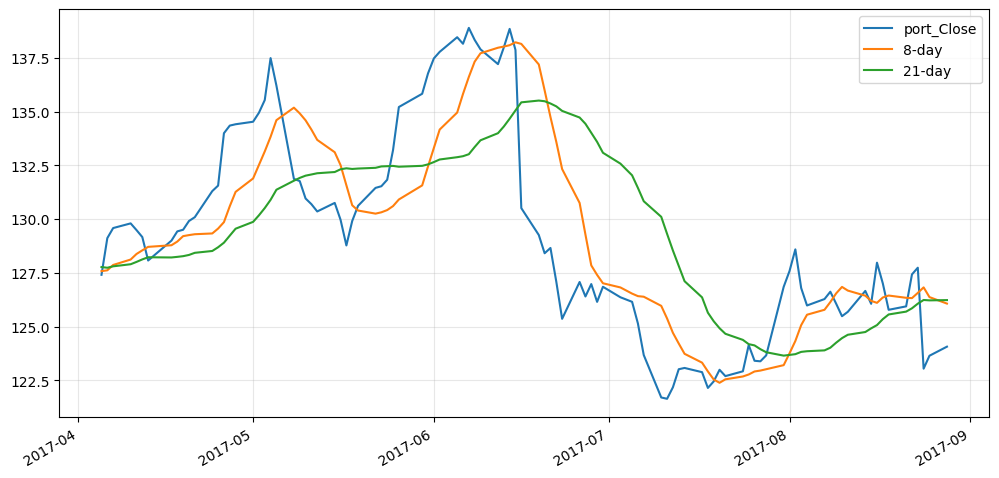

In [ ]:
ms_return.iloc[22:123,[2,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
ms_return['invested'] = np.where(ms_return['8-day'] > ms_return['21-day'], 1, 0)
ms_return.head()

,Day,port_Open,port_Close,port_High,port_Low,8-day,21-day,logClose,return,invested
2017-03-06,43,129.397602,128.014998,130.248002,127.412001,133.316349,130.986762,4.852147,-0.015778,1
2017-03-07,44,127.777396,128.090000,129.186797,127.680595,132.713724,131.021619,4.852733,0.000586,1
2017-03-08,45,128.020599,127.725404,128.491003,127.427202,132.127348,131.049610,4.849883,-0.002850,1
2017-03-09,46,127.842196,127.549202,128.281997,127.055597,131.354474,131.107676,4.848502,-0.001380,1
2017-03-10,47,128.052603,127.542997,128.238800,127.057597,130.535024,131.136715,4.848454,-0.000049,0


In [ ]:
print(ms_return['invested'].value_counts()) 

1    811
0    405
Name: invested, dtype: int64


In [ ]:
ms_return['signal'] = ms_return['invested'].diff()
print(ms_return['signal'].value_counts()) 

 0.0    1153
-1.0      31
 1.0      31
Name: signal, dtype: int64


In [ ]:
ms_return.head()

,Day,port_Open,port_Close,port_High,port_Low,8-day,21-day,logClose,return,invested,signal
2017-03-06,43,129.397602,128.014998,130.248002,127.412001,133.316349,130.986762,4.852147,-0.015778,1,NaN
2017-03-07,44,127.777396,128.090000,129.186797,127.680595,132.713724,131.021619,4.852733,0.000586,1,0.0
2017-03-08,45,128.020599,127.725404,128.491003,127.427202,132.127348,131.049610,4.849883,-0.002850,1,0.0
2017-03-09,46,127.842196,127.549202,128.281997,127.055597,131.354474,131.107676,4.848502,-0.001380,1,0.0
2017-03-10,47,128.052603,127.542997,128.238800,127.057597,130.535024,131.136715,4.848454,-0.000049,0,-1.0


In [ ]:
ms_return['signal'].iloc[0] = 1.0
ms_return.head()

<ipython-input-62-bb5da4d38605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_return['signal'].iloc[0] = 1.0


,Day,port_Open,port_Close,port_High,port_Low,8-day,21-day,logClose,return,invested,signal
2017-03-06,43,129.397602,128.014998,130.248002,127.412001,133.316349,130.986762,4.852147,-0.015778,1,1.0
2017-03-07,44,127.777396,128.090000,129.186797,127.680595,132.713724,131.021619,4.852733,0.000586,1,0.0
2017-03-08,45,128.020599,127.725404,128.491003,127.427202,132.127348,131.049610,4.849883,-0.002850,1,0.0
2017-03-09,46,127.842196,127.549202,128.281997,127.055597,131.354474,131.107676,4.848502,-0.001380,1,0.0
2017-03-10,47,128.052603,127.542997,128.238800,127.057597,130.535024,131.136715,4.848454,-0.000049,0,-1.0


In [ ]:
ms_return[ms_return['signal'].isin([1,-1])]

,Day,port_Open,port_Close,port_High,port_Low,8-day,21-day,logClose,return,invested,signal
2017-03-06,43,129.397602,128.014998,130.248002,127.412001,133.316349,130.986762,4.852147,-0.015778,1,1.0
2017-03-10,47,128.052603,127.542997,128.238800,127.057597,130.535024,131.136715,4.848454,-0.000049,0,-1.0
2017-04-07,67,128.880399,129.587198,129.894000,128.673795,127.870625,127.807523,4.864354,0.003612,1,1.0
2017-05-17,94,129.775601,128.778597,130.489799,128.495798,131.575775,132.366524,4.858095,-0.009231,0,-1.0
2017-06-01,104,137.014199,137.475403,137.748003,136.388201,133.310398,132.655437,4.923445,0.005081,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,1062,269.507608,272.803997,274.897807,268.684394,264.624576,263.350820,5.608754,0.011960,1,1.0
2021-06-04,1113,298.902202,300.298395,301.172007,297.707996,299.357276,299.450487,5.704777,0.006393,0,-1.0
2021-06-24,1127,303.695609,303.031603,305.922800,302.579194,298.707975,298.282086,5.713837,0.002194,1,1.0
2021-09-23,1190,343.448391,343.511400,345.991994,342.328204,346.990101,347.571267,5.839220,0.001171,0,-1.0


In [ ]:
ms_return['system_return'] = ms_return['invested'] * ms_return['return']
ms_return.head()

,Day,port_Open,port_Close,port_High,port_Low,8-day,21-day,logClose,return,invested,signal,system_return
2017-03-06,43,129.397602,128.014998,130.248002,127.412001,133.316349,130.986762,4.852147,-0.015778,1,1.0,-0.015778
2017-03-07,44,127.777396,128.090000,129.186797,127.680595,132.713724,131.021619,4.852733,0.000586,1,0.0,0.000586
2017-03-08,45,128.020599,127.725404,128.491003,127.427202,132.127348,131.049610,4.849883,-0.002850,1,0.0,-0.002850
2017-03-09,46,127.842196,127.549202,128.281997,127.055597,131.354474,131.107676,4.848502,-0.001380,1,0.0,-0.001380
2017-03-10,47,128.052603,127.542997,128.238800,127.057597,130.535024,131.136715,4.848454,-0.000049,0,-1.0,-0.000000


In [ ]:
np.exp(np.sum(ms_return['system_return'])) -1

0.714005823028975

## 3.4 - Buy-and-Hold strategy for the S&P 500 index

In [ ]:
# Retrieving market data for the S&P 500 index
spy = si.get_data('SPY', start_date='01/01/2017', end_date='12/31/2021')
day = np.arange(1, len(spy) + 1) 
spy['Day'] = day
spy.drop(columns=['adjclose', 'volume'], inplace=True)
spy = spy[['Day', 'open', 'high', 'low', 'close']]

# Printing the output
print('S&P 500 Index')
print(spy.head())
print()

S&P 500 Index
            Day        open        high         low       close
2017-01-03    1  225.039993  225.830002  223.880005  225.240005
2017-01-04    2  225.619995  226.750000  225.610001  226.580002
2017-01-05    3  226.270004  226.580002  225.479996  226.399994
2017-01-06    4  226.529999  227.750000  225.899994  227.210007
2017-01-09    5  226.910004  227.070007  226.419998  226.460007



In [ ]:
spy['logClose'] = np.log(spy['close']) # price will always be positive, so this operation is well-defined
spy['return'] = spy['logClose'].diff() # the difference will be positive or negative
spy.head()

,Day,open,high,low,close,logClose,return
2017-01-03,1,225.039993,225.830002,223.880005,225.240005,5.417167,NaN
2017-01-04,2,225.619995,226.750000,225.610001,226.580002,5.423098,0.005932
2017-01-05,3,226.270004,226.580002,225.479996,226.399994,5.422303,-0.000795
2017-01-06,4,226.529999,227.750000,225.899994,227.210007,5.425875,0.003571
2017-01-09,5,226.910004,227.070007,226.419998,226.460007,5.422568,-0.003306


In [ ]:
spy['return'].iloc[0] = 0
spy.head()

<ipython-input-68-9c5f21e35058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['return'].iloc[0] = 0


,Day,open,high,low,close,logClose,return
2017-01-03,1,225.039993,225.830002,223.880005,225.240005,5.417167,0.000000
2017-01-04,2,225.619995,226.750000,225.610001,226.580002,5.423098,0.005932
2017-01-05,3,226.270004,226.580002,225.479996,226.399994,5.422303,-0.000795
2017-01-06,4,226.529999,227.750000,225.899994,227.210007,5.425875,0.003571
2017-01-09,5,226.910004,227.070007,226.419998,226.460007,5.422568,-0.003306


In [ ]:
np.exp(np.sum(spy['return'])) -1

1.1140116855331912

## 3.5 - Plot Comparing the Investment Strategies

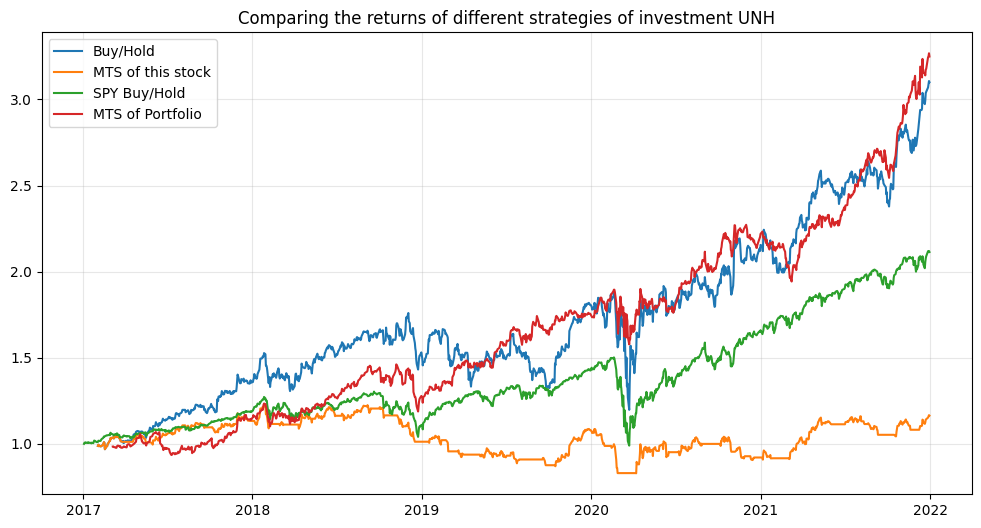

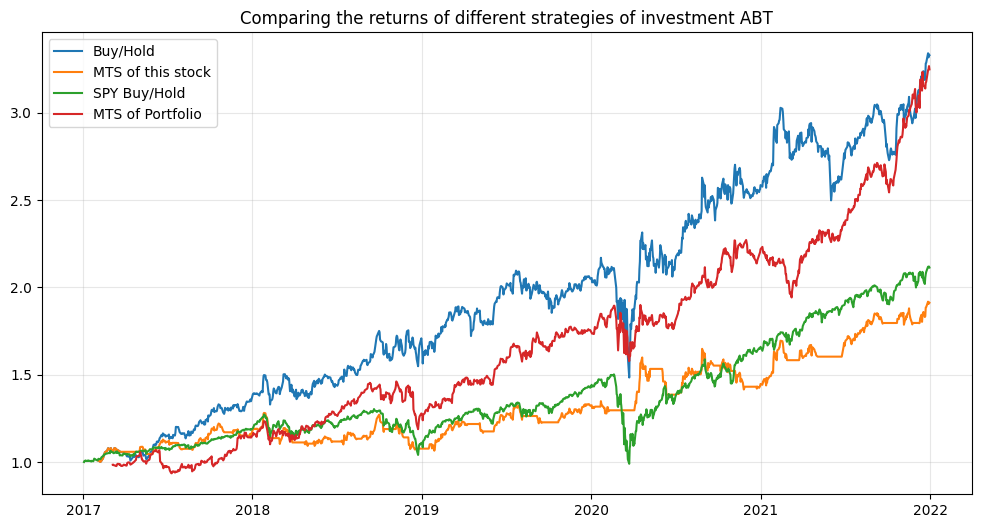

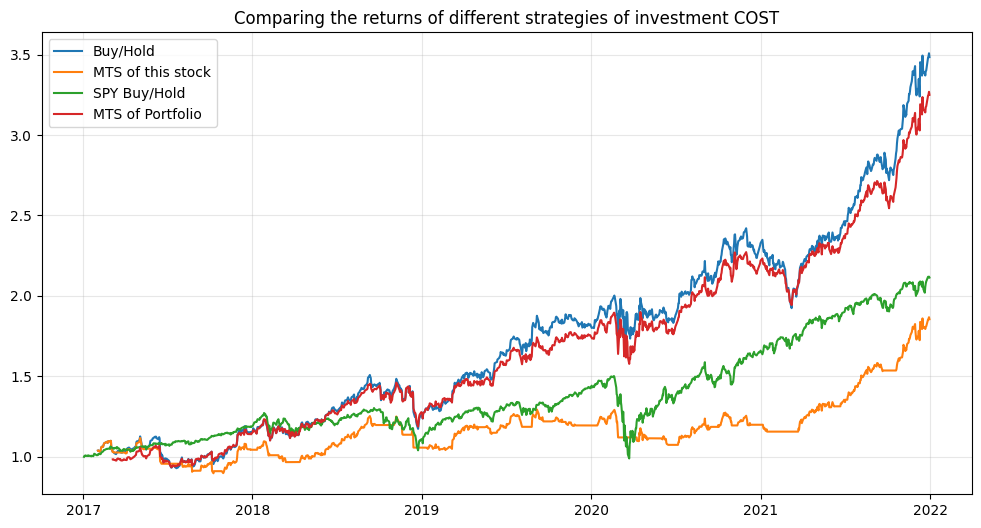

In [ ]:
for stock in sel3:
 plt.plot(np.exp(sel3[stock]['return']).cumprod(), label='Buy/Hold')
 plt.plot(np.exp(sel3[stock]['system_return']).cumprod(), label='MTS of this stock')
 plt.plot(np.exp(spy['return']).cumprod(), label='SPY Buy/Hold')
 plt.plot(np.exp(ms_return['return']).cumprod(), label='MTS of Portfolio')
 plt.title('Comparing the returns of different strategies of investment' +" "+ stock )
 plt.legend(loc=2)
 plt.grid(True, alpha=.3)
 plt.show()

## 3.6 - Discussion and Comparison of the Investment Strategies

In [ ]:
spy_return = np.exp(np.sum(spy['return'])) - 1
print("Return from buying and holding SPY is {:.4f} or {:.2%}".format(spy_return, spy_return))

print()

bh_return=np.exp(np.sum(portfolio_return['weightedReturn'])) -1
print("Return from buying and holding the MPT portfolio is {:.4f} or {:.2%}".format(bh_return, bh_return))

print()

print("Return from using Momentum Trading on the following stocks are")
for stock in sel3:
    sys_return = np.exp(np.sum(sel3[stock]['system_return'])) - 1
    print(f"{stock} System Return: {sys_return:.4f} or {sys_return:.2%}")

print()

mpr=np.exp(np.sum(ms_return['system_return'])) -1
print("Return from using Momentum Trading on the MPT portfolio is {:.4f} or {:.2%}".format(mpr, mpr))

Return from buying and holding SPY is 1.1140 or 111.40%

Return from buying and holding the MPT portfolio is 2.5127 or 251.27%

Return from using Momentum Trading on the following stocks are
UNH System Return: 0.1639 or 16.39%
ABT System Return: 0.9124 or 91.24%
COST System Return: 0.8551 or 85.51%

Return from using Momentum Trading on the MPT portfolio is 0.7140 or 71.40%


# 4 - Conclusion

## 4.1 - Thoughts and Insights

1. Investing in the S&P 500 index through buying and holding SPY has generated a significant return of 111.40% over the analyzed time period, making it a profitable long-term investment.

2. The MPT portfolio has outperformed the SPY index, producing a return of 251.27% over the same time period. This indicates that the MPT approach has been successful in generating higher returns compared to simply investing in the broader market index.

3. Momentum trading on individual stocks in the MPT portfolio has yielded varying returns, with ABT generating the highest return of 91.24%, followed by COST at 85.51%, and UNH at 16.39%. This suggests that momentum trading on individual stocks can be a profitable strategy, but the level of success may vary depending on the specific stock and the trading window.

4. Momentum trading on the MPT portfolio as a whole has produced a return of 71.40%, which is lower than the returns generated by simply holding the MPT portfolio or investing in SPY. This indicates that while momentum trading on individual stocks can be successful, it may not be the most effective strategy for a diversified portfolio.